In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
imacec = pd.read_csv('https://raw.githubusercontent.com/percepcioneseconomicas/indices/main/BC%20Imacec%20nivel.csv', parse_dates=True, dayfirst=True, index_col='Fecha')
ipsa = pd.read_csv('https://raw.githubusercontent.com/percepcioneseconomicas/indices/main/BC%20IPSA.csv', parse_dates=True, dayfirst=True, index_col='Fecha')
dinero = pd.read_csv('https://raw.githubusercontent.com/percepcioneseconomicas/indices/main/BC%20Agregados%20Monetarios.csv', parse_dates=True, dayfirst=True, index_col='Fecha')
colocaciones = pd.read_csv('https://raw.githubusercontent.com/percepcioneseconomicas/indices/main/BC%20Colocaciones.csv', parse_dates=True, dayfirst=True, index_col='Fecha')
internacional = pd.read_csv('https://raw.githubusercontent.com/percepcioneseconomicas/indices/main/BC%20Economia%20Internacional.csv', parse_dates=True, dayfirst=True, index_col='Fecha')
sectoriales = pd.read_csv('https://raw.githubusercontent.com/percepcioneseconomicas/indices/main/BC%20Indices%20Sectoriales.csv', parse_dates=True, dayfirst=True, index_col='Fecha')
inflacion = pd.read_csv('https://raw.githubusercontent.com/percepcioneseconomicas/indices/main/BC%20Inflacion%20anual.csv', parse_dates=True, dayfirst=True, index_col='Fecha')
laboral = pd.read_csv('https://raw.githubusercontent.com/percepcioneseconomicas/indices/main/BC%20Mercado%20Laboral.csv', parse_dates=True, dayfirst=True, index_col='Fecha')
tcn = pd.read_csv('https://raw.githubusercontent.com/percepcioneseconomicas/indices/main/BC%20TCN.csv', parse_dates=True, dayfirst=True, index_col='Fecha')
tasas = pd.read_csv('https://raw.githubusercontent.com/percepcioneseconomicas/indices/main/BC%20Tasas%20del%20BC.csv', parse_dates=True, dayfirst=True, index_col='Fecha')
ice = pd.read_csv('https://raw.githubusercontent.com/percepcioneseconomicas/indices/main/CEEN%20UDD%20ICE.csv', parse_dates=True, dayfirst=True, index_col='Fecha')
imce = pd.read_csv('https://raw.githubusercontent.com/percepcioneseconomicas/indices/main/ICARE%20UAI%20IMCE.csv', parse_dates=True, dayfirst=True, index_col='Fecha')
ipeco = pd.read_csv('https://raw.githubusercontent.com/percepcioneseconomicas/indices/main/CEEN%20UDD%20IPECO.csv', parse_dates=True, dayfirst=True, index_col='Fecha')
ipec = pd.read_csv('https://raw.githubusercontent.com/percepcioneseconomicas/indices/main/GFK%20ADIMARK%20IPEC.csv', parse_dates=True, dayfirst=True, index_col='Fecha')
incertidumbre = pd.read_csv('https://raw.githubusercontent.com/percepcioneseconomicas/indices/main/Clapes%20UC%20IEC%20Coyuntura.csv', parse_dates=True, dayfirst=True, index_col='Fecha')

In [3]:
imacec['dimacec'] = imacec - imacec.shift(1)
imacec['l01_dimacec'] = imacec['dimacec'].shift(1)
imacec['l12_dimacec'] = imacec['dimacec'].shift(12)

In [4]:
percepciones = pd.concat([ice, imce, ipeco, ipec, incertidumbre], axis=1)[['ICE', 'IMCE Total', 'IPeCo', 'IPEC', 'IEC Coyuntura']]

In [5]:
data = pd.concat([ipsa, dinero, colocaciones, internacional, sectoriales, inflacion, laboral, tcn, tasas, percepciones], axis=1)
data = data - data.shift(1)

In [6]:
data = pd.concat([imacec, data], axis=1)

In [7]:
data = data[['dimacec', 'l01_dimacec', 'l12_dimacec', 'IPSA', 'M1', 'M2', 'M3', 'Colocaciones reales',
       'Colocaciones Consumo', 'Colocaciones Vivienda',
       'Colocaciones Comerciales', 'Precio del cobre',
       'Precio del petroleo WTI', 'Spread EMBI Chile',
       'Bono de gobierno a 10 años - EE.UU.',
       'Índice de producción industrial INE', 'Indice de producción Minería',
       'Indice de producción Manufacturera',
       'Despacho de energía eléctrica CDEC (GWh)',
       'Ventas autos nuevos ANAC',
       'IPC General', 'IPC SAE', 'IPC sin volátiles', 'Fuerza de trabajo',
       'Empleo', 'Tasa de desempleo', 'TCN', 'TPM', 'Tasas BCP 2 años',
       'Tasas BCP 5 años', 'Tasas BCP 10 años', 'Tasas BCU 2 años',
       'Tasas BCU 5 años', 'Tasas BCU 10 años', 'ICE', 'IMCE Total', 'IPeCo',
       'IPEC', 'IEC Coyuntura']]

In [27]:
data = data['2010-04':'2021-09']

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 138 entries, 2010-04-01 to 2021-09-01
Freq: MS
Data columns (total 39 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   dimacec                                   138 non-null    float64
 1   l01_dimacec                               138 non-null    float64
 2   l12_dimacec                               138 non-null    float64
 3   IPSA                                      138 non-null    float64
 4   M1                                        138 non-null    float64
 5   M2                                        138 non-null    float64
 6   M3                                        138 non-null    float64
 7   Colocaciones reales                       138 non-null    float64
 8   Colocaciones Consumo                      138 non-null    float64
 9   Colocaciones Vivienda                     138 non-null    float64
 10  Colocacion

In [29]:
X = data.drop(['dimacec'], axis=1)
y = data['dimacec']

print('X:', X.shape)
print('y:', y.shape)

X: (138, 38)
y: (138,)


<AxesSubplot:>

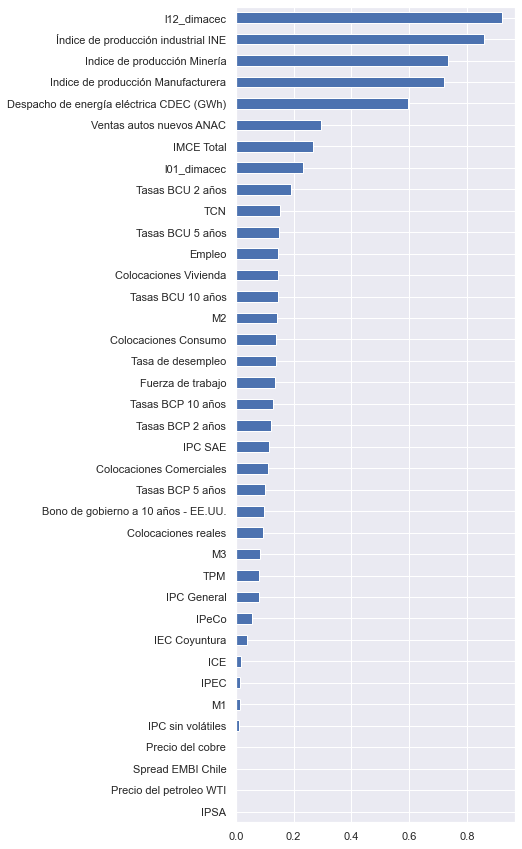

In [30]:
corr_mat = pd.concat([y, X], axis=1).corr()
np.abs(corr_mat['dimacec']).sort_values(ascending=True).drop('dimacec').plot.barh(figsize=(5,15))

In [31]:
X_train = X.loc[:'2017-12']
X_test = X.loc['2018-01':]
y_train = y.loc[:'2017-12']
y_test = y.loc['2018-01':]

print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (93, 38)
X_test: (45, 38)
y_train: (93,)
y_test: (45,)


In [32]:
# Estandarización de variables
scaler = StandardScaler()
Z_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(Z_train, columns=X_train.columns, index=X_train.index)
Z_test = scaler.transform(X_test)
X_test = pd.DataFrame(Z_test, columns=X_test.columns, index=X_test.index)

In [33]:
# Función para calcular las métricas de evaluación. 
def get_metrics(mod, y_test, y_pred):
    return pd.DataFrame({
                'RMSE_CV': np.sqrt(np.abs(searcher.best_score_)),
                'RMSE_Test': np.sqrt(mean_squared_error(y_test, y_pred)),
                'MAE_Test': mean_absolute_error(y_test, y_pred),
                'R2_Test': r2_score(y_test, y_pred)},
                index=[mod])

In [34]:
# DataFrames vacíos para almacenar los resultados 
pred_test = pd.DataFrame(index=y_test.index)
pred_train = pd.DataFrame(index=y_train.index)
results = pd.DataFrame()

In [35]:
mod = 'Linear Regression'
model = ElasticNet(random_state=123)
params = {'alpha': [0]}
searcher = GridSearchCV(estimator=model, 
                        param_grid=params, 
                        scoring='neg_mean_squared_error',
                        cv=5, 
                        verbose=1,
                        n_jobs=-1)
searcher.fit(X_train, y_train)
print("Best CV params", searcher.best_params_)

best_model = searcher.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)
pred_test[mod] = y_pred
pred_train[mod] = y_pred_train

results = results.append(get_metrics(mod, y_test, y_pred))
results.round(4)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best CV params {'alpha': 0}


,RMSE_CV,RMSE_Test,MAE_Test,R2_Test
Linear Regression,1.5698,3.4532,2.494,0.7767


In [36]:
mod = 'Elastic Net'
model = ElasticNet(random_state=123)
params = {
    'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0],
    'l1_ratio': np.linspace(0, 1, 11)
    }
searcher = GridSearchCV(estimator=model, 
                        param_grid=params, 
                        scoring='neg_mean_squared_error',
                        cv=5, 
                        verbose=1,
                        n_jobs=-1)
searcher.fit(X_train, y_train)
print("Best CV params", searcher.best_params_)

best_model = searcher.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)
pred_test[mod] = y_pred
pred_train[mod] = y_pred_train

results = results.append(get_metrics(mod, y_test, y_pred))
results.round(4)

Fitting 5 folds for each of 99 candidates, totalling 495 fits
Best CV params {'alpha': 0.1, 'l1_ratio': 0.9}


,RMSE_CV,RMSE_Test,MAE_Test,R2_Test
Linear Regression,1.5698,3.4532,2.4940,0.7767
Elastic Net,1.3191,3.0626,2.1271,0.8243


In [37]:
mod = 'Bagging'
bmodel = ElasticNet(random_state=123)
model = BaggingRegressor(base_estimator=bmodel)
params = {
    'base_estimator__alpha': [0.1],
    'base_estimator__l1_ratio': [0.5, 1.0],
    'n_estimators': [100, 150], 
    'max_features': [0.5, 0.8]
    }
searcher = GridSearchCV(estimator=model, 
                        param_grid=params, 
                        scoring='neg_mean_squared_error',
                        cv=5, 
                        verbose=1,
                        n_jobs=-1)
searcher.fit(X_train, y_train)
print("Best CV params", searcher.best_params_)

best_model = searcher.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)
pred_test[mod] = y_pred
pred_train[mod] = y_pred_train

results = results.append(get_metrics(mod, y_test, y_pred))
results.round(4)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best CV params {'base_estimator__alpha': 0.1, 'base_estimator__l1_ratio': 1.0, 'max_features': 0.8, 'n_estimators': 150}


,RMSE_CV,RMSE_Test,MAE_Test,R2_Test
Linear Regression,1.5698,3.4532,2.4940,0.7767
Elastic Net,1.3191,3.0626,2.1271,0.8243
Bagging,1.3482,3.0217,2.1875,0.8290


In [38]:
mod = 'Random Forest'
model = RandomForestRegressor(random_state=123)
params = {'n_estimators': [300, 500],
          'max_features': ['log2', 'sqrt'],
          'max_depth': [10, 20, 30],
          'min_samples_leaf': [2, 5]}
searcher = GridSearchCV(estimator=model, 
                        param_grid=params, 
                        scoring='neg_mean_squared_error',
                        cv=5, 
                        verbose=1,
                        n_jobs=-1)
searcher.fit(X_train, y_train)
print("Best CV params", searcher.best_params_)

best_model = searcher.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)
pred_test[mod] = y_pred
pred_train[mod] = y_pred_train

results = results.append(get_metrics(mod, y_test, y_pred))
results.round(4)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best CV params {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'n_estimators': 300}


,RMSE_CV,RMSE_Test,MAE_Test,R2_Test
Linear Regression,1.5698,3.4532,2.4940,0.7767
Elastic Net,1.3191,3.0626,2.1271,0.8243
Bagging,1.3482,3.0217,2.1875,0.8290
Random Forest,2.3840,3.8540,2.9171,0.7218


In [39]:
mod = 'XGBoost'
model = xgb.XGBRegressor(random_state=123)
params = {'colsample_bytree': [0.5, 0.75],
          'n_estimators': [100, 250],
          'max_depth': [2, 7, 15],
          'min_child_weight': [5, 10, 15],
          'eta': [0.01, 0.1]}
searcher = GridSearchCV(estimator=model, 
                        param_grid=params, 
                        scoring='neg_mean_squared_error',
                        cv=5, 
                        verbose=1,
                        n_jobs=-1)
searcher.fit(X_train, y_train)
print("Best CV params", searcher.best_params_)

best_model = searcher.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)
pred_test[mod] = y_pred
pred_train[mod] = y_pred_train

results = results.append(get_metrics(mod, y_test, y_pred))
results.round(4)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[14:19:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best CV params {'colsample_bytree': 0.5, 'eta': 0.01, 'max_depth': 2, 'min_child_weight': 5, 'n_estimators': 100}


,RMSE_CV,RMSE_Test,MAE_Test,R2_Test
Linear Regression,1.5698,3.4532,2.4940,0.7767
Elastic Net,1.3191,3.0626,2.1271,0.8243
Bagging,1.3482,3.0217,2.1875,0.8290
Random Forest,2.3840,3.8540,2.9171,0.7218
XGBoost,1.4157,2.7632,1.9588,0.8570


In [40]:
# importances_xgcl = pd.Series(best_model.feature_importances_, index=X_train.columns)
# sorted_importances_xgcl = importances_xgcl.sort_values()
# sorted_importances_xgcl.plot(kind='barh', color='blue', figsize=(20,10))
# plt.title('Feature importances')
# # plt.grid()
# plt.show()

In [41]:
K_train = pd.concat([X_train,pred_train], axis=1)
K_test = pd.concat([X_test,pred_test], axis=1)

In [42]:
mod = 'Stacking'
model = xgb.XGBRegressor(random_state=123)
params = {'colsample_bytree': [0.5, 0.75],
          'n_estimators': [100, 250],
          'max_depth': [2, 7, 15],
          'min_child_weight': [5, 10, 15],
          'eta': [0.01, 0.1]}
searcher = GridSearchCV(estimator=model, 
                        param_grid=params, 
                        scoring='neg_mean_squared_error',
                        cv=5, 
                        verbose=1,
                        n_jobs=-1)
searcher.fit(K_train, y_train)
print("Best CV params", searcher.best_params_)

best_model = searcher.best_estimator_
y_pred = best_model.predict(K_test)
y_pred_train = best_model.predict(K_train)
pred_test[mod] = y_pred
pred_train[mod] = y_pred_train

results = results.append(get_metrics(mod, y_test, y_pred))
results.round(4)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[14:19:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best CV params {'colsample_bytree': 0.5, 'eta': 0.01, 'max_depth': 2, 'min_child_weight': 5, 'n_estimators': 100}


,RMSE_CV,RMSE_Test,MAE_Test,R2_Test
Linear Regression,1.5698,3.4532,2.4940,0.7767
Elastic Net,1.3191,3.0626,2.1271,0.8243
Bagging,1.3482,3.0217,2.1875,0.8290
Random Forest,2.3840,3.8540,2.9171,0.7218
XGBoost,1.4157,2.7632,1.9588,0.8570
Stacking,0.8530,2.8797,2.0863,0.8447


<Figure size 432x288 with 0 Axes>

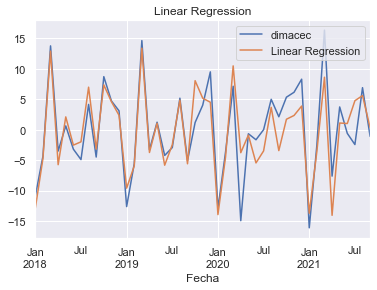

<Figure size 432x288 with 0 Axes>

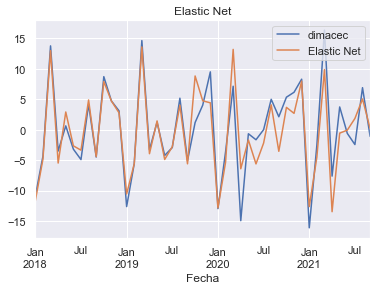

<Figure size 432x288 with 0 Axes>

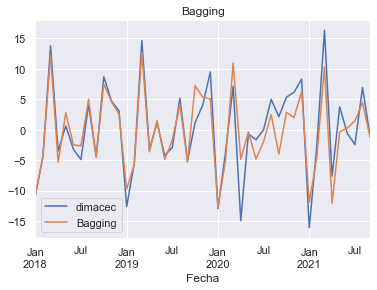

<Figure size 432x288 with 0 Axes>

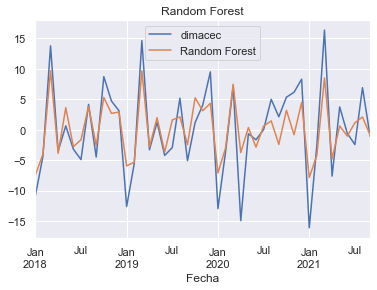

<Figure size 432x288 with 0 Axes>

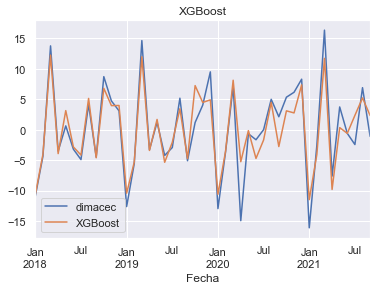

<Figure size 432x288 with 0 Axes>

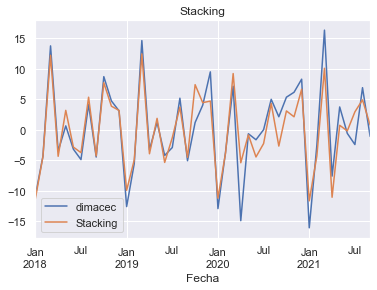

In [43]:
for e in pred_test.columns:
    plt.figure()
    pd.concat([y_test, pred_test[e]], axis=1).plot()
    plt.title(e)

In [44]:
print(results[['RMSE_CV', 'RMSE_Test', 'MAE_Test']].idxmin())
print('\n')
print(results[['R2_Test']].idxmax())

RMSE_CV      Stacking
RMSE_Test     XGBoost
MAE_Test      XGBoost
dtype: object


R2_Test    XGBoost
dtype: object


Text(0.5, 1.0, 'XGBoost')

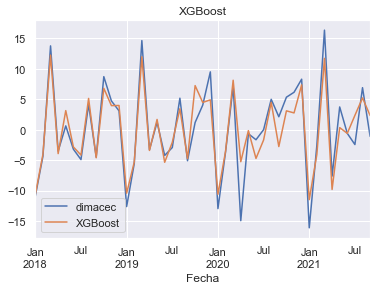

In [45]:
pd.concat([y_test, pred_test['XGBoost']], axis=1).plot()
plt.title('XGBoost')

In [46]:
((results['R2_Test'] /results['R2_Test'].loc['Linear Regression'] -1 )*100).round(2)

Linear Regression     0.00
Elastic Net           6.14
Bagging               6.74
Random Forest        -7.06
XGBoost              10.34
Stacking              8.76
Name: R2_Test, dtype: float64